In [1]:
import torch
from torch import nn
from matplotlib import pyplot as plt

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [38]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias


In [39]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [9]:
def plot_pred(
        train_data=X_train,
        test_data=X_test,
        train_labels=y_train,
        test_labels=y_test,
        predictions=None,
):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b",s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g",s=4, label="test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r",s=4, label="predictions")
    plt.legend(prop={'size': 14})

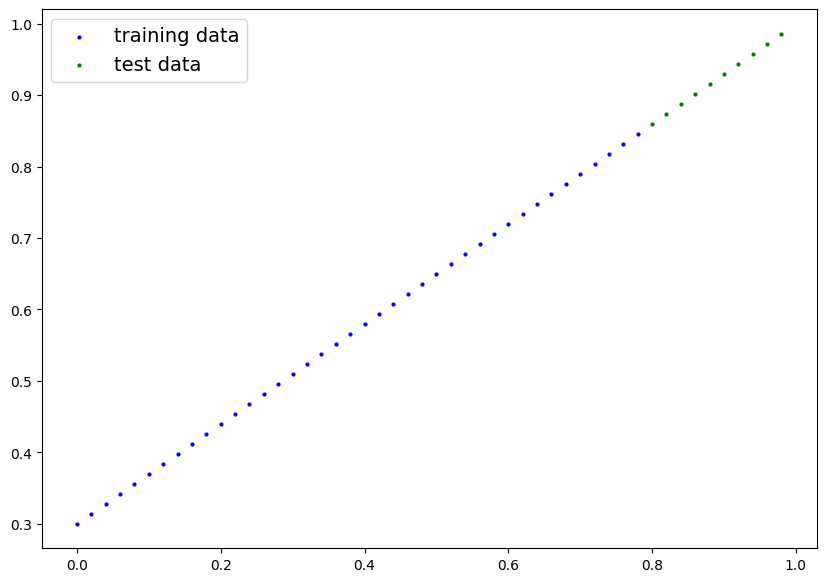

In [10]:
plot_pred()

In [23]:
class LinerRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1,)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinerRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [24]:
next(model_1.parameters()).device

device(type='cpu')

In [25]:
model_1.to(device)

LinerRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [26]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [27]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)

In [ ]:
#put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [33]:
torch.manual_seed(42)
epochs = 20000



for epoch in range(epochs):

    #start training
    model_1.train()

    #forward pass
    y_pred = model_1(X_train)

    #calculate loss
    loss = loss_function(y_pred, y_train)

    #set gradients to 0
    optimizer.zero_grad()

    #perform backpropagation
    loss.backward()

    #perform gradient descent to change weight and bias
    optimizer.step()

    #testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_function(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"epoch {epoch},test loss: {test_loss}, loss: {test_loss}")

epoch 0,test loss: 0.04726768285036087, loss: 0.04726768285036087
epoch 10,test loss: 0.03379688784480095, loss: 0.03379688784480095
epoch 20,test loss: 0.02032606676220894, loss: 0.02032606676220894
epoch 30,test loss: 0.007426714990288019, loss: 0.007426714990288019
epoch 40,test loss: 0.007407677359879017, loss: 0.007407677359879017
epoch 50,test loss: 0.0190771222114563, loss: 0.0190771222114563
epoch 60,test loss: 0.028085077181458473, loss: 0.028085077181458473
epoch 70,test loss: 0.03448789194226265, loss: 0.03448789194226265
epoch 80,test loss: 0.03905702382326126, loss: 0.03905702382326126
epoch 90,test loss: 0.042284972965717316, loss: 0.042284972965717316
epoch 100,test loss: 0.044561710208654404, loss: 0.044561710208654404
epoch 110,test loss: 0.04618941619992256, loss: 0.04618941619992256
epoch 120,test loss: 0.04717463254928589, loss: 0.04717463254928589
epoch 130,test loss: 0.04766683652997017, loss: 0.04766683652997017
epoch 140,test loss: 0.04794773459434509, loss: 0.0

In [34]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3008], device='cuda:0'))])

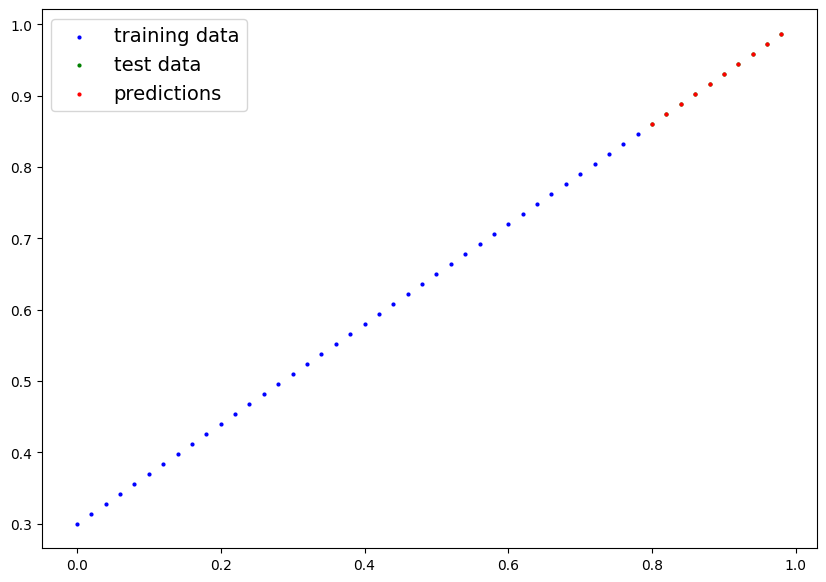

In [37]:
plot_pred(predictions=test_pred.to("cpu"))